In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reviews/7282_1.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv


**Read Dataframe**

In [37]:
raw = pd.read_csv("/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv")
raw

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Accommodation & Food Services,Rockaway Beach,US,us/or/rockawaybeach/215spacificst/-1035432852,45.611260,...,2016-03-23T00:00:00Z,3.0,http://www.tripadvisor.com/Hotel_Review-g52043...,It is hard for me to review an oceanfront hote...,Picture Window Ocean View!,Wildwood,GA,LASH0211,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,669 Route 6a,"Hotel,Hotels",Accommodation & Food Services,East Sandwich,US,us/ma/eastsandwich/669route6a/-1480952475,41.729390,...,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",4.0,https://www.tripadvisor.com/Hotel_Review-g4154...,"I live close by, and needed to stay somewhere ...","Clean, comfortable and quiet",East Sandwich,MA,Gennaker,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,702 W Appleway Ave,"Hotel,Hotel, Motel, and Buildi

In [38]:
raw.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'websites'],
      dtype='object')

**Get only columns that will we use**

In [39]:
df = raw[["name", "reviews.rating", "reviews.title", "reviews.text"]]
df

,name,reviews.rating,reviews.title,reviews.text
0,Rancho Valencia Resort Spa,5.0,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...
1,Rancho Valencia Resort Spa,5.0,Sweet sweet serenity,Amazing place. Everyone was extremely warm and...
2,Rancho Valencia Resort Spa,5.0,Amazing Property and Experience,We booked a 3 night stay at Rancho Valencia to...
3,Aloft Arundel Mills,2.0,"Never again...beware, if you want sleep.",Currently in bed writing this for the past hr ...
4,Aloft Arundel Mills,5.0,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...
...,...,...,...,...
9995,Silver Sands Oceanfront Motel,3.0,Picture Window Ocean View!,It is hard for me to review an oceanfront hote...
9996,Sandy Neck Motel,4.0,"Clean, comfortable and quiet","I live close by, and needed to stay somewhere ..."
9997,Shilo Inn Suites - Coeur d'Alene,4.0,Passing through,Rolled in 11:30 laid out heads down woke up to...
9998,Scottish Inn,1.0,Terrible,Absolutely terrible..I was told I was being gi...


**Rename column and remove records that contain null**

In [40]:
df.columns = ["name", "rating", "title", "text"]

df = df[(df.title.isna() == False) & (df.text.isna() == False)]

**Data cleansing**

In [41]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase then remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [42]:
df_cleaned = df
df_cleaned.title = df_cleaned.title.apply(round1)
df_cleaned.text = df_cleaned.text.apply(round1)
df_cleaned

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,rating,title,text
0,Rancho Valencia Resort Spa,5.0,best romantic vacation ever,our experience at rancho valencia was absolute...
1,Rancho Valencia Resort Spa,5.0,sweet sweet serenity,amazing place everyone was extremely warm and ...
2,Rancho Valencia Resort Spa,5.0,amazing property and experience,we booked a night stay at rancho valencia to ...
3,Aloft Arundel Mills,2.0,never againbeware if you want sleep,currently in bed writing this for the past hr ...
4,Aloft Arundel Mills,5.0,always great stay,i live in md and the aloft is my home away fro...
...,...,...,...,...
9995,Silver Sands Oceanfront Motel,3.0,picture window ocean view,it is hard for me to review an oceanfront hote...
9996,Sandy Neck Motel,4.0,clean comfortable and quiet,i live close by and needed to stay somewhere f...
9997,Shilo Inn Suites - Coeur d'Alene,4.0,passing through,rolled in laid out heads down woke up to cont...
9998,Scottish Inn,1.0,terrible,absolutely terriblei was told i was being give...


**Vectorize words**

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_cleaned.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

In [44]:
data_dtm

,aaa,aamiaisen,aamupala,aaron,aarp,aback,abandoned,abbiamo,abbondante,abby,...,çπ,éà,éä,éé,éï,éñ,éõ,éû,éü,êñü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Get most frequent words**

In [45]:
data = data_dtm
summed = data.sum().reset_index()
summed.columns = ["word", "ct"]
top_dict = {}
for idx, row in summed.iterrows():
    top_dict[row.word] = row.ct

words = sorted(top_dict.items(), key=lambda x: x[1], reverse=True)

In [46]:
words[:20]

[('hotel', 6621),
 ('room', 6518),
 ('staff', 3988),
 ('stay', 3728),
 ('good', 3477),
 ('great', 3473),
 ('clean', 3315),
 ('breakfast', 2893),
 ('nice', 2781),
 ('rooms', 2276),
 ('friendly', 2091),
 ('location', 1990),
 ('stayed', 1761),
 ('comfortable', 1691),
 ('time', 1416),
 ('place', 1382),
 ('night', 1363),
 ('service', 1359),
 ('area', 1357),
 ('helpful', 1306)]

In [47]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(["stay", "hotel", "room"]) #Remove most frequent and common words for hotel

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data[["title", "text"]])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_stop.index = data_clean.index
data_cv


<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

**Generating Word Cloud to visualize most common word in the reviews**

In [48]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [50]:
title = '' 
text = ''
for idx, row in df_cleaned.iterrows():
    title += f" {row.title}"
    text += f" {row.text}"

In [51]:
title_cleaned = []
for x in title.split():
    if x not in stop_words:
        title_cleaned.append(x)
title_cleaned = " ".join(title_cleaned)

In [52]:
text_cleaned = []
for x in text.split():
    if x not in stop_words:
        text_cleaned.append(x)
text_cleaned = " ".join(text_cleaned)

(-0.5, 399.5, 199.5, -0.5)

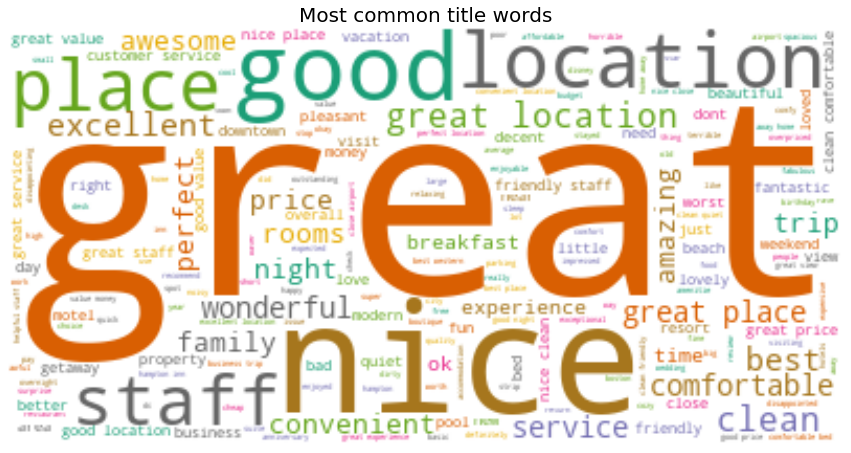

In [74]:
# Reset the output dimensions
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
wc.generate(title_cleaned)
plt.imshow(wc, interpolation="bilinear")
plt.title("Most common title words", fontsize = 20)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

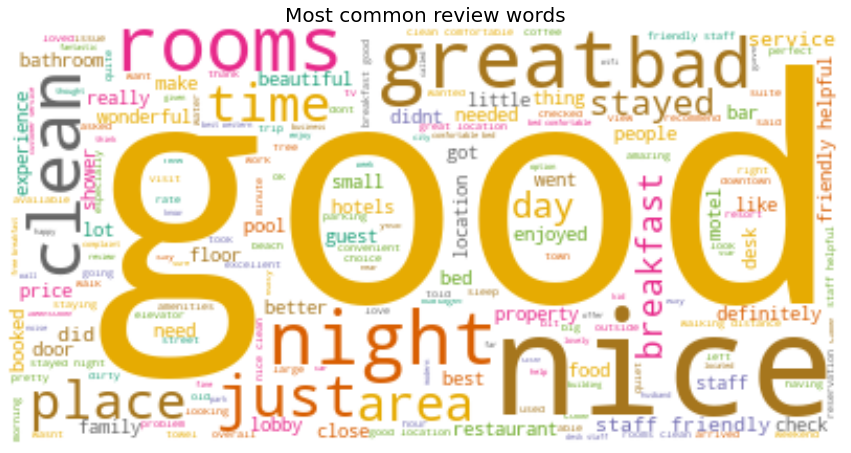

In [75]:
# Reset the output dimensions
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
wc.generate(text_cleaned)
plt.imshow(wc, interpolation="bilinear")
plt.title("Most common review words", fontsize = 20)
plt.axis("off")
# plt.title(full_names[index])

**Get reviews polarity and subjectivity**

In [55]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['title_polarity'] = df['title'].apply(pol)
df['title_subjectivity'] = df['title'].apply(sub)

df['text_polarity'] = df['text'].apply(pol)
df['text_subjectivity'] = df['text'].apply(sub)
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,name,rating,title,text,title_polarity,title_subjectivity,text_polarity,text_subjectivity
0,Rancho Valencia Resort Spa,5.0,best romantic vacation ever,our experience at rancho valencia was absolute...,0.500000,0.400000,0.589286,0.642857
1,Rancho Valencia Resort Spa,5.0,sweet sweet serenity,amazing place everyone was extremely warm and ...,0.350000,0.650000,0.375000,0.531250
2,Rancho Valencia Resort Spa,5.0,amazing property and experience,we booked a night stay at rancho valencia to ...,0.600000,0.900000,0.488889,0.538889
3,Aloft Arundel Mills,2.0,never againbeware if you want sleep,currently in bed writing this for the past hr ...,0.000000,0.000000,-0.125000,0.325000
4,Aloft Arundel Mills,5.0,always great stay,i live in md and the aloft is my home away fro...,0.800000,0.750000,0.284787,0.531633
...,...,...,...,...,...,...,...,...
9995,Silver Sands Oceanfront Motel,3.0,picture window ocean view,it is hard for me to review an oceanfront hote...,0.000000,0.000000,0.179500,0.574167
9996,Sandy Neck Motel,4.0,clean comfortable and quiet,i live close by and needed to stay somewhere f...,0.255556,0.611111,0.281639,0.537121
9997,Shilo Inn Suites - Coeur d'Alene,4.0,passing through,rolled in laid out heads down woke up to cont...,0.000000,0.000000,0.382063,0.755556
9998,Scottish Inn,1.0,terrible,absolutely terriblei was told i was being give...,-1.000000,1.000000,0.080000,0.400000


**Grouping dataframe by hotel's name, and get the average of each columns**

In [56]:
df_grouped = df.groupby("name").mean()

In [57]:
df_grouped["total_reviews"] = df.groupby("name").count()["rating"]

In [58]:
df_grouped

,rating,title_polarity,title_subjectivity,text_polarity,text_subjectivity,total_reviews
name,,,,,,
1906 Lodge At Coronado Beach,5.000000,0.000000,0.000000,0.295661,0.667011,1
250 Main Hotel,5.000000,0.083333,0.166667,0.223333,0.511667,2
AC Hotel Chicago Downtown,4.081818,0.454149,0.530932,0.324105,0.597268,11
AC Hotel Miami Beach,5.000000,0.600000,1.000000,0.473214,0.642063,1
AC Hotel by Marriott Boston Downtown,5.000000,1.000000,1.000000,0.188889,0.558333,1
...,...,...,...,...,...,...
XV Beacon,5.000000,0.700000,0.950000,0.335357,0.667063,1
Yakutat Lodge,5.000000,0.800000,0.750000,0.413194,0.575000,1
dana hotel and spa,4.482609,0.414921,0.592552,0.217213,0.624808,46


**Binning, based on text polarity**

In [59]:
def polarity_binning(x):
    if x < -.4:
        return "Terrible"
    elif x < -.1:
        return "Bad"
    elif x < .1:
        return "Neutral"
    elif x < .5:
        return "Good"
    else:
        return "Great"

get_polarity = lambda x: polarity_binning(x)

In [60]:
df_grouped["polarity_bin"] = df_grouped.text_polarity.apply(get_polarity)

**Create popularity column, based on average ratings and number of reviews**

In [61]:
df_grouped["popularity"] = df_grouped["rating"] * df_grouped["total_reviews"]

In [62]:
df_grouped

,rating,title_polarity,title_subjectivity,text_polarity,text_subjectivity,total_reviews,polarity_bin,popularity
name,,,,,,,,
1906 Lodge At Coronado Beach,5.000000,0.000000,0.000000,0.295661,0.667011,1,Good,5.0
250 Main Hotel,5.000000,0.083333,0.166667,0.223333,0.511667,2,Good,10.0
AC Hotel Chicago Downtown,4.081818,0.454149,0.530932,0.324105,0.597268,11,Good,44.9
AC Hotel Miami Beach,5.000000,0.600000,1.000000,0.473214,0.642063,1,Good,5.0
AC Hotel by Marriott Boston Downtown,5.000000,1.000000,1.000000,0.188889,0.558333,1,Good,5.0
...,...,...,...,...,...,...,...,...
XV Beacon,5.000000,0.700000,0.950000,0.335357,0.667063,1,Good,5.0
Yakutat Lodge,5.000000,0.800000,0.750000,0.413194,0.575000,1,Good,5.0
dana hotel and spa,4.482609,0.414921,0.592552,0.217213,0.624808,46,Good,206.2


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Text review categories')

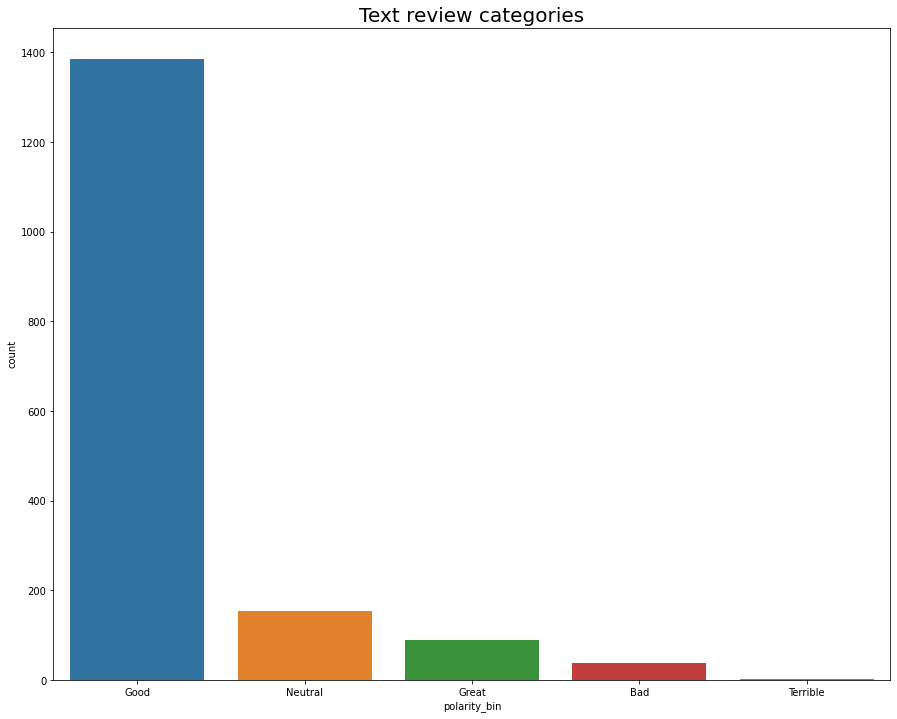

In [76]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 12]
sns.countplot(df_grouped.polarity_bin)
plt.title("Text review categories", fontsize = 20)

In [64]:
df_grouped[(df_grouped.polarity_bin == "Good") & (df_grouped.total_reviews > 10)]

,rating,title_polarity,title_subjectivity,text_polarity,text_subjectivity,total_reviews,polarity_bin,popularity
name,,,,,,,,
AC Hotel Chicago Downtown,4.081818,0.454149,0.530932,0.324105,0.597268,11,Good,44.90
ARIA Resort Casino,4.503597,0.442380,0.539794,0.331785,0.575313,139,Good,626.00
Aloft New Orleans Downtown,4.230769,0.389907,0.573397,0.274090,0.536887,39,Good,165.00
Aloft Philadelphia Downtown,5.000000,0.427803,0.510559,0.311901,0.542469,16,Good,80.00
Americas Best Value Inn,3.307692,0.034066,0.575733,0.207050,0.515966,13,Good,43.00
...,...,...,...,...,...,...,...,...
Virgin Hotels Chicago,4.776316,0.516062,0.592856,0.272832,0.579891,19,Good,90.75
Virginia Beach Resort Hotel Conference Center,3.785714,0.275387,0.496905,0.221201,0.550784,42,Good,159.00
W Boston,4.225641,0.320584,0.502792,0.219828,0.611117,78,Good,329.60


Text(0.5, 1.0, 'Total review and polarity correlation')

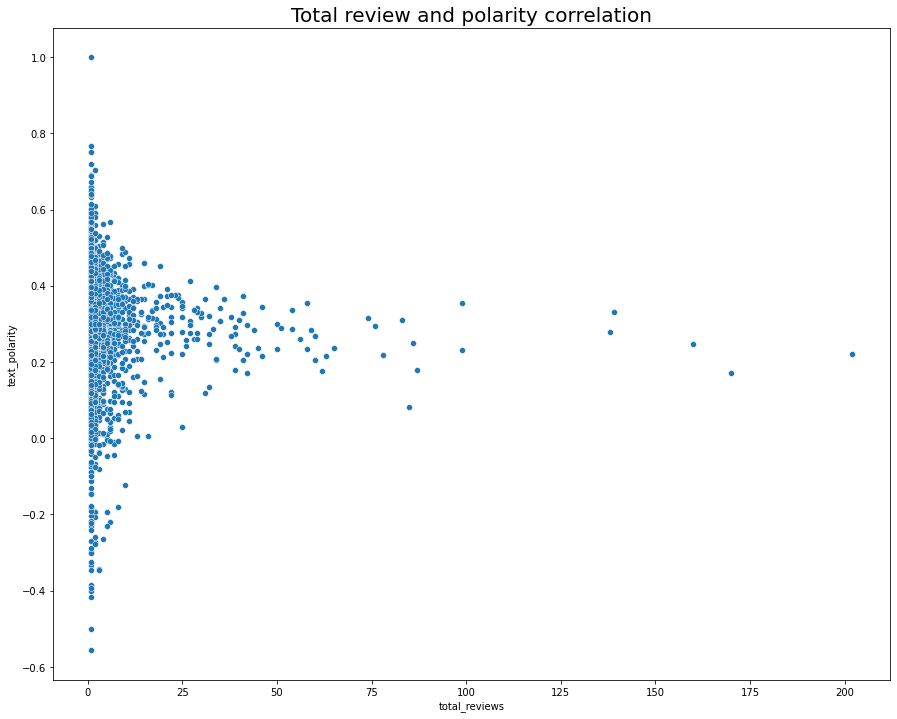

In [79]:
sns.scatterplot(y = "text_polarity", x = "total_reviews", data=df_grouped)
plt.title("Total review and polarity correlation", fontsize = 20)

Text(0.5, 1.0, 'Total review and rating correlation')

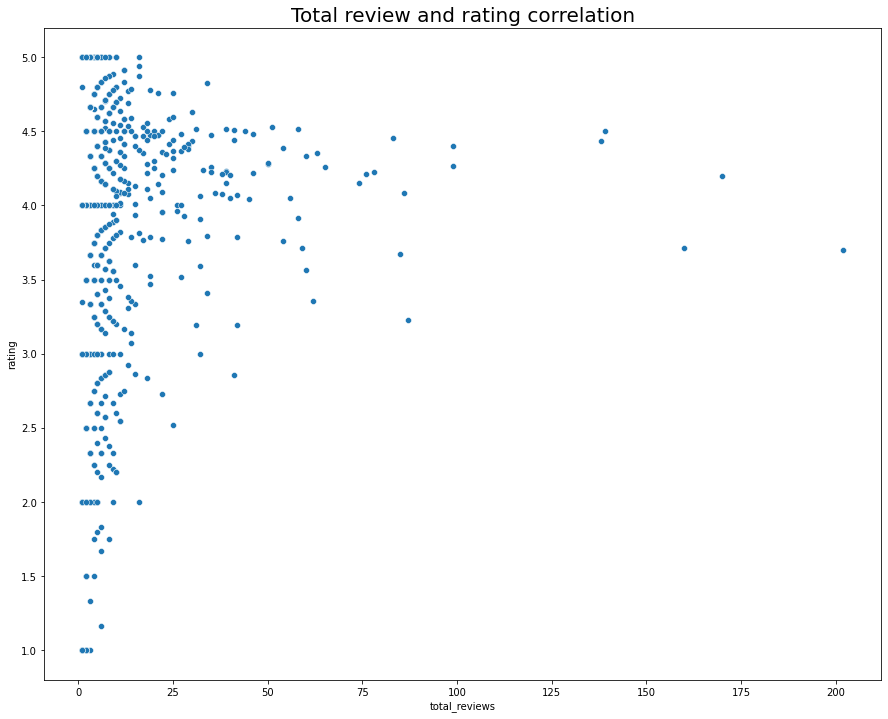

In [80]:
sns.scatterplot(y = "rating", x = "total_reviews", data=df_grouped)
plt.title("Total review and rating correlation", fontsize = 20)

Text(0.5, 1.0, 'Text and Title polarity')

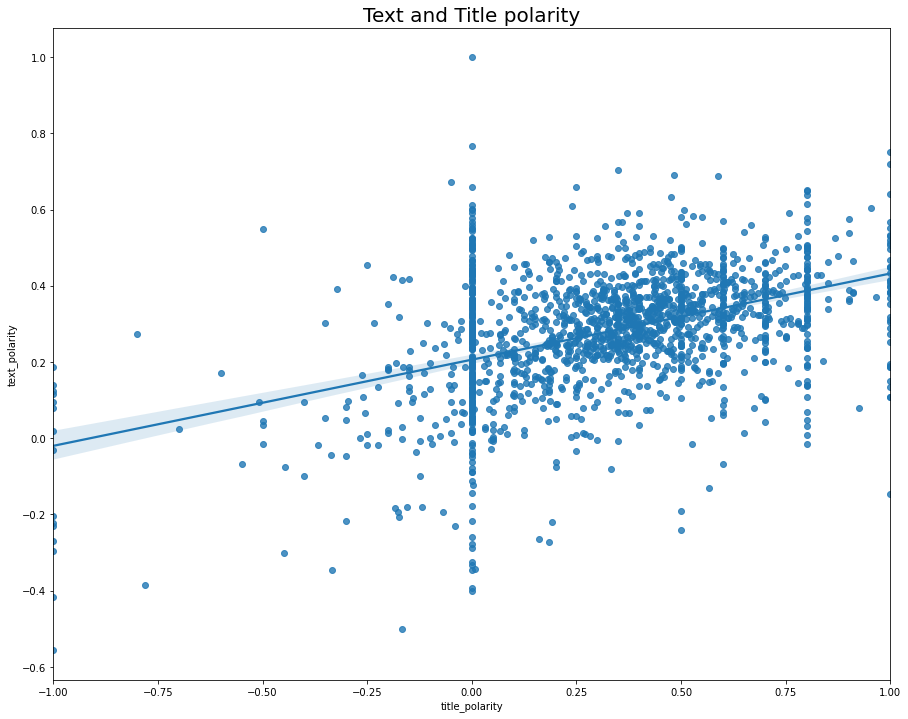

In [81]:
sns.regplot(y = "text_polarity", x = "title_polarity", data=df_grouped)
plt.title("Text and Title polarity", fontsize = 20)

**Plot best hotels based on total reviews and ratings**

In [68]:
df_grouped.sort_values("popularity", ascending=False).iloc[0:10]

,rating,title_polarity,title_subjectivity,text_polarity,text_subjectivity,total_reviews,polarity_bin,popularity
name,,,,,,,,
Metro Points Hotel-Washington North,3.702970,0.307714,0.493898,0.220330,0.566658,202,Good,748.00
The Westin Las Vegas Hotel & Spa,4.199412,0.342375,0.568057,0.170168,0.619160,170,Good,713.90
ARIA Resort Casino,4.503597,0.442380,0.539794,0.331785,0.575313,139,Good,626.00
Kinzie Hotel,4.438043,0.433419,0.572562,0.277968,0.637507,138,Good,612.45
Best Western Springfield,3.712500,0.289165,0.451869,0.247617,0.541967,160,Good,594.00
Honua Kai Resort Spa,4.404040,0.446574,0.552648,0.354200,0.563412,99,Good,436.00
The Charlesmark Hotel,4.265657,0.444494,0.580737,0.230365,0.611489,99,Good,422.30
Embassy Suites by Hilton Crystal City National Airport,4.457831,0.369926,0.501014,0.310796,0.594867,83,Good,370.00
"The Virginian Suites, an Ascend Hotel Collection Member",4.081395,0.360914,0.466168,0.249200,0.530325,86,Good,351.00


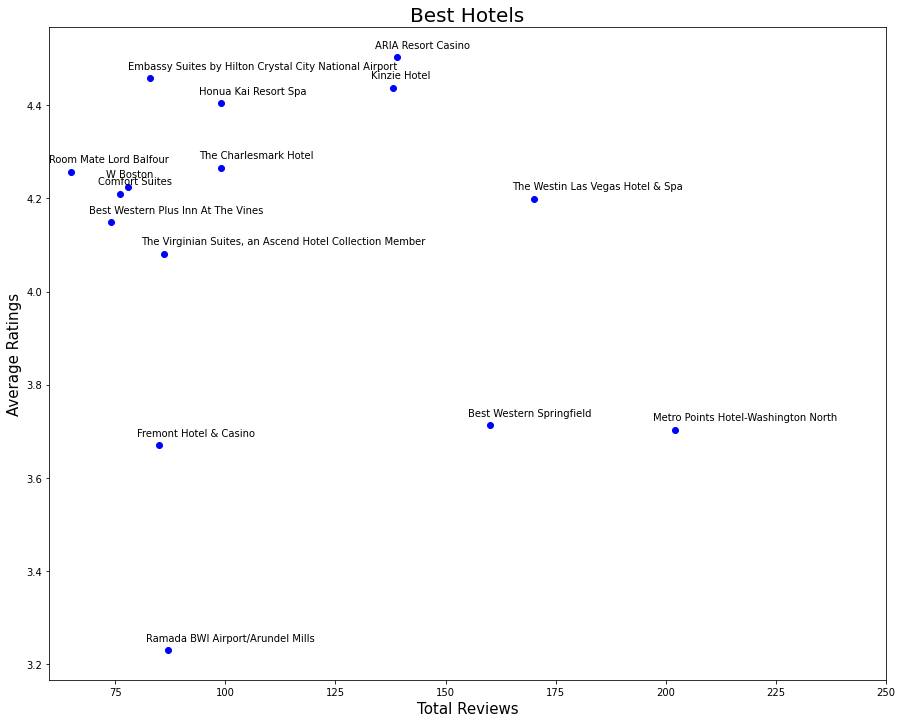

In [69]:
most_popular = df_grouped.sort_values("popularity", ascending=False).iloc[0:15]

for index, hotel in enumerate(most_popular.index):
    x = most_popular.total_reviews.loc[hotel]
    y = most_popular.rating.loc[hotel]
    plt.scatter(x, y, color='blue')
    plt.text(x-5, y+.02, hotel, fontsize=10)
    plt.xlim(60, 250) 
    
plt.title('Best Hotels', fontsize=20)
plt.xlabel('Total Reviews', fontsize=15)
plt.ylabel('Average Ratings', fontsize=15)

plt.show()